In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from urllib.request import urlopen
import json
import re
#hello

In [2]:
response = urlopen("https://api.weather.gov/points/34.031,-118.182")
json_data = response.read().decode('utf-8', 'replace')
d = json.loads(json_data)
df = pd.json_normalize(d["properties"])

response = urlopen(df["forecastHourly"][0])
json_data = response.read().decode('utf-8', 'replace')

d = json.loads(json_data)
df = pd.json_normalize(d["properties"])

df = pd.json_normalize(df["periods"][0])

In [3]:
df["day"]=0
df["hour"]=0

for i in range(df.shape[0]):
	
	# pattern to extract day
	pattern = r'(?=...........-)..'
	df["day"][i] = re.search(pattern, df["startTime"][i])[0]

	# pattern to extract hour
	pattern = r'(?=........-)..'
	df["hour"][i] = re.search(pattern, df["startTime"][i])[0]

df["day"]=df["day"].astype(int)
df["hour"]=df["hour"].astype(int)

C:\Users\Ivan\AppData\Local\Temp\ipykernel_24124\2507923163.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["day"][i] = re.search(pattern, df["startTime"][i])[0]
C:\Users\Ivan\AppData\Local\Temp\ipykernel_24124\2507923163.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hour"][i] = re.search(pattern, df["startTime"][i])[0]


In [4]:
df["day_hour"]=df["day"].astype(str) + "_" + df["hour"].astype(str)

In [5]:
df

,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,windSpeed,windDirection,...,detailedForecast,probabilityOfPrecipitation.unitCode,probabilityOfPrecipitation.value,dewpoint.unitCode,dewpoint.value,relativeHumidity.unitCode,relativeHumidity.value,day,hour,day_hour
0,1,,2023-09-19T18:00:00-07:00,2023-09-19T19:00:00-07:00,False,70,F,None,5 mph,SW,...,,wmoUnit:percent,1,wmoUnit:degC,13.888889,wmoUnit:percent,67,19,18,19_18
1,2,,2023-09-19T19:00:00-07:00,2023-09-19T20:00:00-07:00,False,67,F,None,5 mph,SW,...,,wmoUnit:percent,1,wmoUnit:degC,13.888889,wmoUnit:percent,75,19,19,19_19
2,3,,2023-09-19T20:00:00-07:00,2023-09-19T21:00:00-07:00,False,65,F,None,0 mph,SW,...,,wmoUnit:percent,1,wmoUnit:degC,13.888889,wmoUnit:percent,81,19,20,19_20
3,4,,2023-09-19T21:00:00-07:00,2023-09-19T22:00:00-07:00,False,65,F,None,0 mph,SW,...,,wmoUnit:percent,1,wmoUnit:degC,14.444444,wmoUnit:percent,83,19,21,19_21
4,5,,2023-09-19T22:00:00-07:00,2023-09-19T23:00:00-07:00,False,63,F,None,0 mph,SW,...,,wmoUnit:percent,1,wmoUnit:degC,13.888889,wmoUnit:percent,87,19,22,19_22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,,2023-09-26T01:00:00-07:00,2023-09-26T02:00:00-07:00,False,61,F,None,5 mph,E,...,,wmoUnit:percent,0,wmoUnit:degC,12.777778,wmoUnit:percent,85,26,1,26_1
152,153,,2023-09-26T02:00:00-07:00,2023-09-26T03:00:00-07:00,False,60,F,None,5 mph,ENE,...,,wmoUnit:percent,0,wmoUnit:degC,12.777778,wmoUnit:percent,87,26,2,26_2
153,154,,2023-09-26T03:00:00-07:00,2023-09-26T04:00:00-07:00,False,60,F,None,5 mph,ENE,...,,wmoUnit:percent,0,wmoUnit:degC,12.777778,wmoUnit:percent,88,26,3,26_3
154,155,,2023-09-26T04:00:00-07:00,2023-09-26T05:00:00-07:00,False,59,F,None,5 mph,ENE,...,,wmoUnit:percent,0,wmoUnit:degC,12.777778,wmoUnit:percent,90,26,4,26_4


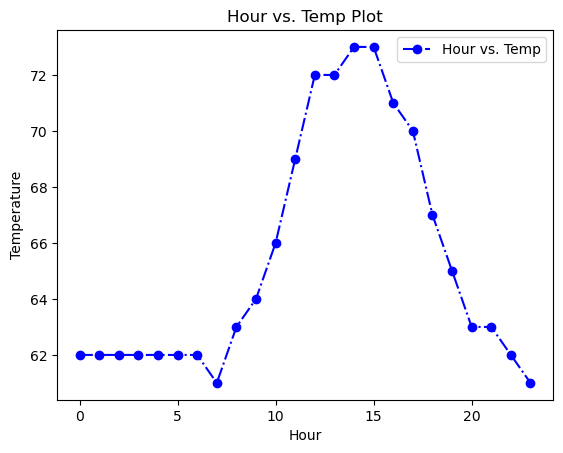

In [6]:
%matplotlib inline
df1=df[df["day"]==20]
fig, ax = plt.subplots()

# Step 3: Specify the x and y coordinates from the DataFrame
x = df1['hour']
y = df1['temperature']

# Step 4: Customize the plot (optional)
ax.plot(x, y, marker='o', linestyle='-.', color='b', label='Hour vs. Temp')
ax.set_xlabel('Hour')
ax.set_ylabel('Temperature')
ax.set_title('Hour vs. Temp Plot')
ax.legend()

# Step 5: Display the plot
plt.show()

In [7]:
df["shortForecast"].value_counts()

Mostly Sunny                25
Mostly Clear                22
Patchy Fog                  19
Sunny                       19
Mostly Cloudy               17
Partly Cloudy               17
Partly Sunny                13
Patchy Drizzle              12
Slight Chance Light Rain    12
Name: shortForecast, dtype: int64

In [8]:
print(json_data)

{
    "@context": [
        "https://geojson.org/geojson-ld/geojson-context.jsonld",
        {
            "@version": "1.1",
            "wx": "https://api.weather.gov/ontology#",
            "geo": "http://www.opengis.net/ont/geosparql#",
            "unit": "http://codes.wmo.int/common/unit/",
            "@vocab": "https://api.weather.gov/ontology#"
        }
    ],
    "type": "Feature",
    "geometry": {
        "type": "Polygon",
        "coordinates": [
            [
                [
                    -118.2036004,
                    34.048139800000001
                ],
                [
                    -118.1989652,
                    34.0259146
                ],
                [
                    -118.17215330000001,
                    34.029752299999998
                ],
                [
                    -118.17678330000001,
                    34.051977899999997
                ],
                [
                    -118.2036004,
                    34